In [1]:
import pandas as pd

# Find your exact file path
import os
for root, dirs, files in os.walk("/kaggle/input"):
    for name in files:
        print(os.path.join(root, name))


/kaggle/input/lifestyleanalysis/lifestylestudentanalysisfinal.xlsx


In [2]:


path = "/kaggle/input/lifestyleanalysis/lifestylestudentanalysisfinal.xlsx"
import pandas as pd

performance = pd.read_excel(path, sheet_name="performance")
sleep       = pd.read_excel(path, sheet_name="sleep")
screen      = pd.read_excel(path, sheet_name="screen")



merged = performance.merge(sleep, on="id").merge(screen, on="id")

merged.head()
merged.shape
merged.columns


Index(['id', 'age_x', 'gender_x', 'study hours ', 'GPA', 'age_y', 'gender_y',
       'sleep hours', 'age', 'gender', 'screen time '],
      dtype='object')

In [3]:
merged = merged.drop(columns=['age_y', 'gender_y', 'age', 'gender'], errors='ignore')
merged.columns = merged.columns.str.strip()
merged = merged.rename(columns={
    'id': 'sid',
    'age_x': 'age',
    'gender_x': 'gender',
    'study hours': 'studyhours',
    'sleep hours': 'sleephours',
    'screen time': 'screentime',
    'GPA': 'gpa'
}, errors='ignore')


merged.columns


Index(['sid', 'age', 'gender', 'studyhours', 'gpa', 'sleephours',
       'screentime'],
      dtype='object')

In [4]:

mean_study = merged['studyhours'].mean()
mean_sleep = merged['sleephours'].mean()
mean_screen = merged['screentime'].mean()
mean_marks = merged['gpa'].mean()

median_study = merged['studyhours'].median()
median_sleep = merged['sleephours'].median()
median_screen = merged['screentime'].median()
median_marks = merged['gpa'].median()

mode_study = merged['studyhours'].mode()[0]
mode_sleep = merged['sleephours'].mode()[0]
mode_screen = merged['screentime'].mode()[0]
mode_marks = merged['gpa'].mode()[0]

std_study = merged['studyhours'].std()
std_sleep = merged['sleephours'].std()
std_screen = merged['screentime'].std()
std_marks = merged['gpa'].std()

print("STATISTICAL SUMMARY ")
print("StudyHours- Mean:", mean_study, " Median:", median_study, " Mode:", mode_study, " Std Dev:", std_study)
print("SleepHours- Mean:", mean_sleep, " Median:", median_sleep, " Mode:", mode_sleep, " Std Dev:", std_sleep)
print("ScreenTime- Mean:", mean_screen, " Median:", median_screen, " Mode:", mode_screen, " Std Dev:", std_screen)
print("Marks     - Mean:", mean_marks, " Median:", median_marks, " Mode:", mode_marks, " Std Dev:", std_marks)

STATISTICAL SUMMARY 
StudyHours- Mean: 9.548494983277592  Median: 9.0  Mode: 11  Std Dev: 5.618774503568782
SleepHours- Mean: 6.911036789297658  Median: 7.1  Mode: 7.2  Std Dev: 0.6674442353986121
ScreenTime- Mean: 7.518729096989968  Median: 7.7  Mode: 7.9  Std Dev: 3.77210492438817
Marks     - Mean: 1.9464882943143813  Median: 2.0  Mode: 2  Std Dev: 0.96437170962529


H0: Screen time has no effect on Marks
H1: Screen time affects Marks
correlation:  -0.026106405398276127
p_value:  0.6529933091924472
Therefore,Screen time does not significantly affects marks


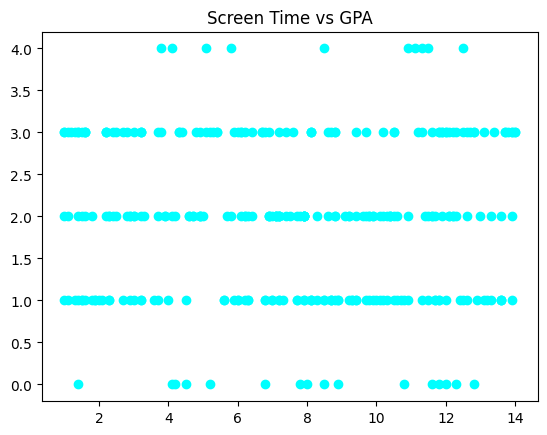

In [5]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
print("H0: Screen time has no effect on Marks")
print("H1: Screen time affects Marks")

corr,p_value=pearsonr(merged["screentime"],merged['gpa'])
print("correlation: ",corr)
print("p_value: ",p_value)

if p_value<0.05:
    (print("reject hypothesis"))
else: 
    print("Therefore,Screen time does not significantly affects marks")

plt.scatter(x='screentime', y='gpa', data=merged,color='cyan')
plt.title("Screen Time vs GPA")
plt.show()


H0: Sleep hours has no effect on Marks
H1: Sleep hours affects Marks
correlation:  0.07651549802589024
p_value:  0.1870120947658047
Therefore,Sleep hours do not significantly affects marks


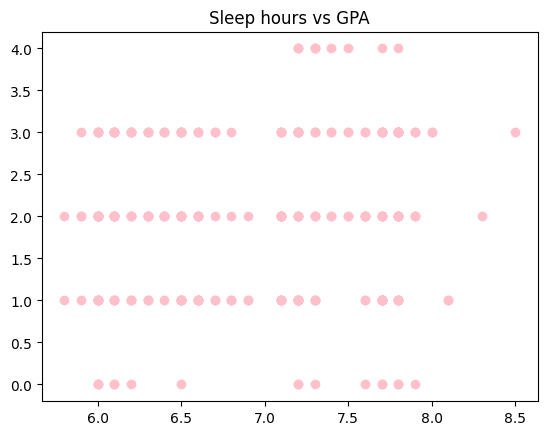

In [6]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
print("H0: Sleep hours has no effect on Marks")
print("H1: Sleep hours affects Marks")

corr,p_value=pearsonr(merged["sleephours"],merged['gpa'])
print("correlation: ",corr)
print("p_value: ",p_value)

if p_value<0.05:
    (print("reject hypothesis"))
else: 
    print("Therefore,Sleep hours do not significantly affects marks")

plt.scatter(x='sleephours', y='gpa', data=merged,color='pink')
plt.title("Sleep hours vs GPA")
plt.show()

H0: Study hours have no effect on Marks
H1: Study hours affect Marks
correlation:  0.13177109282099903
p_value:  0.022670799756212
Reject hypothesis,Therefore study hours significantly affect marks


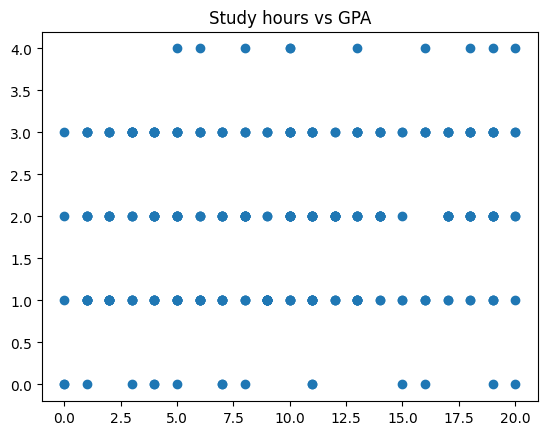

In [7]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
print("H0: Study hours have no effect on Marks")
print("H1: Study hours affect Marks")

corr,p_value=pearsonr(merged["studyhours"],merged['gpa'])
print("correlation: ",corr)
print("p_value: ",p_value)

if p_value<0.05:
    (print("Reject hypothesis,Therefore study hours significantly affect marks"))
else: 
    print("Therefore,Study hours does not significantly affects marks")

plt.scatter(x='studyhours', y='gpa', data=merged)
plt.title("Study hours vs GPA")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


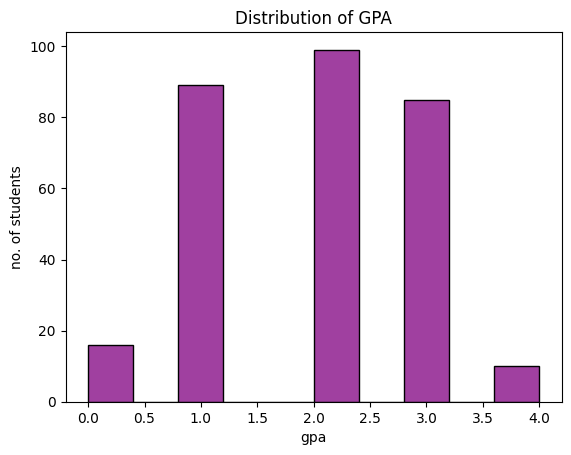

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


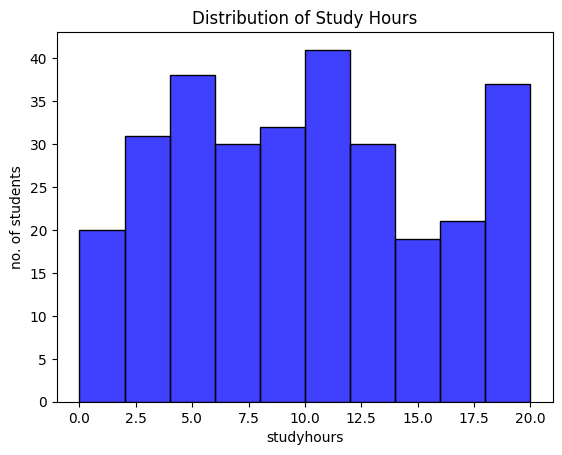

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


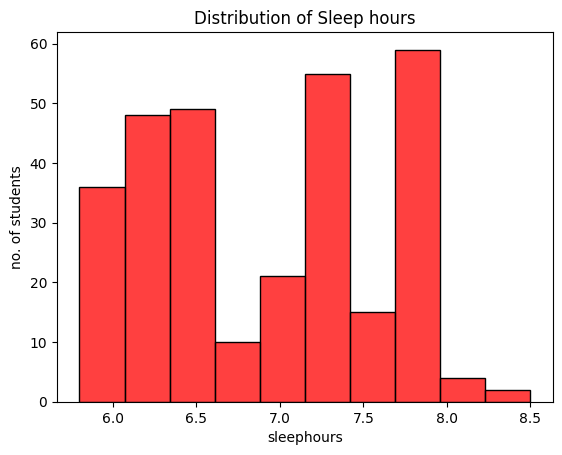

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


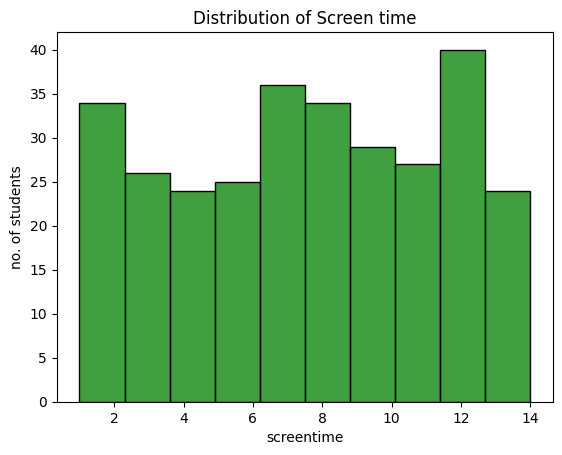

In [8]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(merged['gpa'],color='purple')
plt.title("Distribution of GPA")
plt.ylabel("no. of students")  
plt.show()

sns.histplot(merged['studyhours'],color='blue')
plt.title("Distribution of Study Hours")
plt.ylabel("no. of students")  
plt.show()

sns.histplot(merged['sleephours'],color='red')
plt.title("Distribution of Sleep hours")
plt.ylabel("no. of students")  
plt.show()

sns.histplot(merged['screentime'],color='green')
plt.title("Distribution of Screen time")
plt.ylabel("no. of students")  
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
x=merged[['studyhours']]
y=merged[['gpa']]
model=LinearRegression()
model.fit(x,y)
print("coefficient: ",model.coef_[0])
print("intercept: ",model.intercept_)
print("R^2 score: ",model.score(x,y))

coefficient:  [0.02261638]
intercept:  [1.73053595]
R^2 score:  0.017363620903240395
